# Calculate series of Popen curves for $\alpha_1$ GlyR: Flip mechanism (WT from Burzomato 2004)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import yaml
from scalcs import popen
from scalcs import scplotlib as scpl
from scalcs import cjumps

In [2]:
def ratio_maxPopen(mec1, mec2, tres):
    emaxPopen1 = popen.maxPopen(mec1, tres)
    emaxPopen2 = popen.maxPopen(mec2, tres)
    return emaxPopen1 / emaxPopen2 

#### Original rate constants for rat WT  $\alpha_1$ GlyR taken from Burzomato 2004

In [3]:
tres = 30e-6
filename = "Flip_a1GlyRWT_Burz2004.yaml"
stream = open(filename, 'r')
mec0 = yaml.load(stream)
stream.close()
mec0.printout()
stream = open(filename, 'r')
mec = yaml.load(stream)


class dcpyps.Mechanism
Values of unit rates [1/sec]:
0	From AF*  	to AF    	alpha1       	4100.0
1	From AF  	to AF*    	beta1        	1500.0
2	From A2F*  	to A2F    	alpha2       	1400.0
3	From A2F  	to A2F*    	beta2        	18000.0
4	From A3F*  	to A3F    	alpha3       	700.0
5	From A3F  	to A3F*    	beta3        	28000.0
6	From A3F  	to A3R    	gama3        	1600.0
7	From A3R  	to A3F    	delta3       	13000.0
8	From A3F  	to A2F    	3kf(-3)      	4500.0
9	From A2F  	to A3F    	kf(+3)       	11000000.0
10	From A2F  	to A2R    	gama2        	11500.0
11	From A2R  	to A2F    	delta2       	15500.0
12	From A2F  	to AF    	2kf(-2)      	3000.0
13	From AF  	to A2F    	2kf(+2)      	22000000.0
14	From AF  	to AR    	gama1        	500.0
15	From AR  	to AF    	delta1       	100.0
16	From A3R  	to A2R    	3k(-3)       	600.0
17	From A2R  	to A3R    	k(+3)        	230000.0
18	From A2R  	to AR    	2k(-2)       	400.0
19	From AR  	to A2R    	2k(+2)       	460000.0
20	From AR  	to R    	k(-1)   

In [4]:
c0, pe0, pi0 = scpl.Popen(mec0, tres)

##### Effect of changing $\delta_3$ only

Original mec:  maxPopen = 0.96095;  EC50 = 155.97 microM;  nH = 2.2392
Modified mec:  maxPopen = 0.94043;  EC50 = 157.66 microM;  nH = 2.2295
EC50 ratio:  1.0108173034289274
Modified mec:  maxPopen = 0.90126;  EC50 = 158.78 microM;  nH = 2.2264
EC50 ratio:  1.0179888462245026
Modified mec:  maxPopen = 0.89607;  EC50 = 159.87 microM;  nH = 2.2113
EC50 ratio:  1.0249816223304788


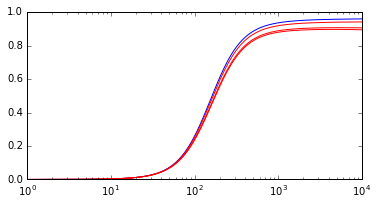

In [5]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.semilogx(c0, pe0)
print('Original mec: ', popen.print_pars(mec0, tres))
for newrate in [1300, 130, 13]:
    mec.Rates[7].rateconstants = newrate
    c, pe, pi = scpl.Popen(mec, tres)
    ax.semilogx(c, pe, 'r-')
    print('Modified mec: ', popen.print_pars(mec, tres))
    print('EC50 ratio: ', popen.EC50(mec, tres) / popen.EC50(mec0, tres))
    #print('maxPopen ratio: ', ratio_maxPopen(mec, mec0, tres))

##### Effect of changing $\delta_2$ only

Original mec:  maxPopen = 0.96095;  EC50 = 155.97 microM;  nH = 2.2392
Modified mec:  maxPopen = 0.80781;  EC50 = 340.63 microM;  nH = 1.8899
EC50 ratio:  2.183880441548357
Modified mec:  maxPopen = 0.462;  EC50 = 616.98 microM;  nH = 1.8232
EC50 ratio:  3.955707969597024
Modified mec:  maxPopen = 0.24724;  EC50 = 599.03 microM;  nH = 1.6123
EC50 ratio:  3.840590995128968


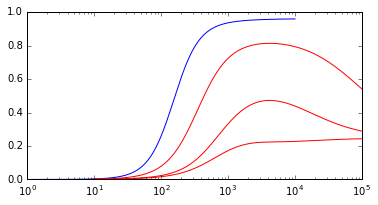

In [6]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.semilogx(c0, pe0)
print('Original mec: ', popen.print_pars(mec0, tres))
for newrate in [1550, 155, 15.5]:
    mec.Rates[11].rateconstants = newrate
    c, pe, pi = scpl.Popen(mec, tres)
    ax.semilogx(c, pe, 'r-')
    print('Modified mec: ', popen.print_pars(mec, tres))
    print('EC50 ratio: ', popen.EC50(mec, tres) / popen.EC50(mec0, tres))
    #print('maxPopen ratio: ', ratio_maxPopen(mec, mec0, tres))

##### Effect of changing $\delta_1$, $\delta_2$ and $\delta_3$ by same factor

Original mec:  maxPopen = 0.96095;  EC50 = 155.97 microM;  nH = 2.2392
Modified mec:  maxPopen = 0.93652;  EC50 = 408.29 microM;  nH = 2.1867
EC50 ratio:  2.6177162504112865
Modified mec:  maxPopen = 0.74715;  EC50 = 1150.4 microM;  nH = 1.724
EC50 ratio:  7.375463304078516
Modified mec:  maxPopen = 0.24724;  EC50 = 2491.5 microM;  nH = 1.373
EC50 ratio:  15.973801352874712


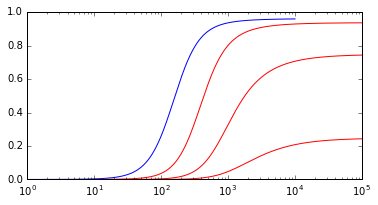

In [7]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.semilogx(c0, pe0)
print('Original mec: ', popen.print_pars(mec0, tres))
for nr1, nr2, nr3 in zip([1300, 130, 13], [1550, 155, 15.5], [10, 1, 0.1]):
    mec.Rates[7].rateconstants = nr1 # delta3
    mec.Rates[11].rateconstants = nr2 # delta2
    mec.Rates[15].rateconstants = nr3 # delta1
    c, pe, pi = scpl.Popen(mec, tres)
    ax.semilogx(c, pe, 'r-')
    print('Modified mec: ', popen.print_pars(mec, tres))
    print('EC50 ratio: ', popen.EC50(mec, tres) / popen.EC50(mec0, tres))

### Plot macroscopic response to an exponentially decaying concentration jump 

In [8]:
# Reduce all, delta3, delta2 and delta1, 100 times
mec.Rates[7].rateconstants = 133 # delta3
mec.Rates[11].rateconstants = 155 # delta2
mec.Rates[15].rateconstants = 1 # delta1

In [9]:
cmax = 3e-3 # max concentrations
cb = 0.0 # basal concentrations
prepulse = 5e-3 # time before pulse starts
tdec = 2.5e-3 # decay time constant
cjargs = (cmax, cb, prepulse, tdec)

cjlen = 0.05 # Record length
cjstep = 5e-6 # Sampling step
cjfunc = cjumps.pulse_instexp

t, c, Popen, P  = cjumps.solve_jump(mec, cjlen, cjstep, cjfunc, cjargs)
maxP, maxC = max(Popen), max(c)
c1 = (c / maxC) * 0.2 * maxP + 1.02 * maxP

Peak Popen =  0.128636737731


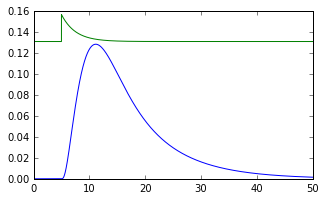

In [10]:
fig, ax  = plt.subplots(1,1, figsize=(5,3))
ax.plot(t * 1000, Popen,'b-', t * 1000, c1, 'g-')
print("Peak Popen = ", max(Popen))

In [11]:
#fout = open('trace.txt','w')
#for i in range(t.shape[0]):
#    fout.write('{0:.6e}\t{1:.6e}\n'.format(t[i], Popen[i]))
#fout.close()

#### Effect of changing $\gamma_3$ 

Original mec:  maxPopen = 0.96095;  EC50 = 155.97 microM;  nH = 2.2392
Modified mec:  maxPopen = 0.93758;  EC50 = 408.29 microM;  nH = 2.1865
EC50 ratio:  2.6177162504112865
Modified mec:  maxPopen = 0.96148;  EC50 = 154.09 microM;  nH = 2.2307
EC50 ratio:  0.9879154078549848
Modified mec:  maxPopen = 0.96394;  EC50 = 58.413 microM;  nH = 1.9668
EC50 ratio:  0.3745053905697899


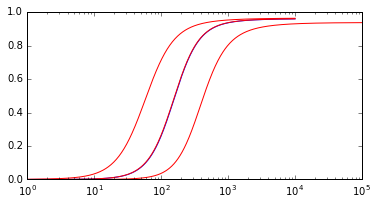

In [12]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.semilogx(c0, pe0)
print('Original mec: ', popen.print_pars(mec0, tres))
for nr1, nr2, nr3 in zip([160, 16, 1.6], [1150, 115, 11.5], [50, 5, 0.5]):
    mec.Rates[6].rateconstants = nr1 # gamma3
    mec.Rates[10].rateconstants = nr2 # gamma2
    mec.Rates[14].rateconstants = nr3 # gamma1
    c, pe, pi = scpl.Popen(mec, tres)
    ax.semilogx(c, pe, 'r-')
    print('Modified mec: ', popen.print_pars(mec, tres))
    print('EC50 ratio: ', popen.EC50(mec, tres) / popen.EC50(mec0, tres))

#### Changing $\beta$

Original mec:  maxPopen = 0.96095;  EC50 = 155.97 microM;  nH = 2.2392
Modified mec:  maxPopen = 0.78155;  EC50 = 167.64 microM;  nH = 1.8393
EC50 ratio:  1.0747922560995244
Modified mec:  maxPopen = 0.28814;  EC50 = 356.14 microM;  nH = 1.5457
EC50 ratio:  2.283336437402545
Modified mec:  maxPopen = 0.039453;  EC50 = 438.09 microM;  nH = 1.4588
EC50 ratio:  2.808790429273424


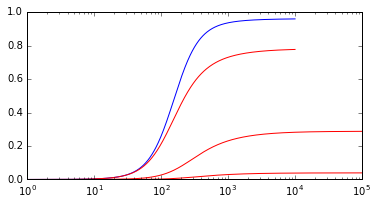

In [13]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.semilogx(c0, pe0)
print('Original mec: ', popen.print_pars(mec0, tres))
for nr1, nr2, nr3 in zip([2800, 280, 28], [1800, 180, 18], [150, 15, 1.5]):
    mec.Rates[5].rateconstants = nr1 # beta3
    mec.Rates[3].rateconstants = nr2 # beta2
    mec.Rates[1].rateconstants = nr3 # beta1
    c, pe, pi = scpl.Popen(mec, tres)
    ax.semilogx(c, pe, 'r-')
    print('Modified mec: ', popen.print_pars(mec, tres))
    print('EC50 ratio: ', popen.EC50(mec, tres) / popen.EC50(mec0, tres))